<a href="https://colab.research.google.com/github/amatchison/CS4410/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris

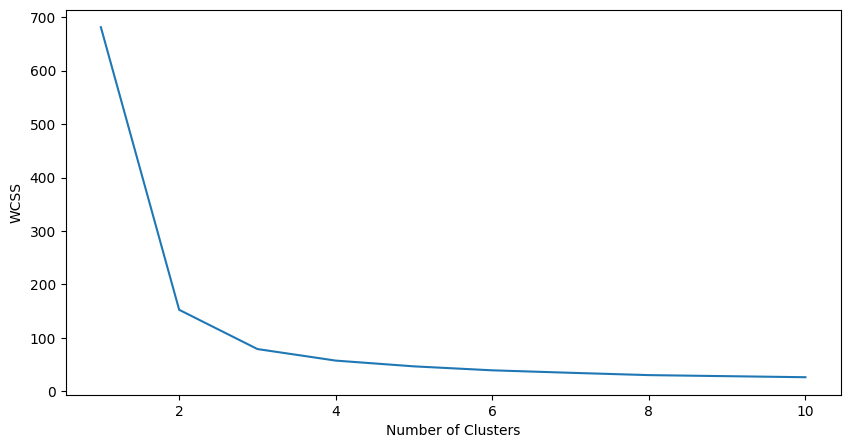

In [12]:
#load iris dataset
iris = load_iris()

#create list to hold wcss values
wcss = []

#test k values 1-10
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, n_init=10)
  kmeans.fit(iris.data)
  wcss.append(kmeans.inertia_)

#plot results
fig = plt.figure(figsize=(10,5))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [13]:
from sklearn.datasets import fetch_openml

In [15]:
mnist = fetch_openml('mnist_784', parser = 'auto')

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import time

In [34]:
#split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target)

#apply logistic regression without PCA
model = LogisticRegression(solver='lbfgs')

start = time.time()
model.fit (X_train, y_train)
stop = time.time()

#get the accuracy score and time
y_pred = model.predict(X_test)
score1 = accuracy_score(y_test, y_pred)
time1 = (stop - start)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
#apply PCA
pca = PCA(n_components=2, random_state=11)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

#apply logistic regression with PCA
start = time.time()
model.fit (X_train_pca, y_train)
stop = time.time()

#get the accuracy score and time
y_pred = model.predict(X_test_pca)
score2 = accuracy_score(y_test, y_pred)
time2 = (stop - start)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
#Compare time and accuracy with PCA and without PCA.
print(f'Accuracy Without PCA: {score1:.2%}')
print(f'Accuracy With PCA: {score2:.2%}')
print()
print(f'Training Time Without PCA: {time1:.2f} seconds')
print(f'Training Time With PCA: {time2:.2f} seconds')

Accuracy Without PCA: 92.09%
Accuracy With PCA: 42.86%

Training Time Without PCA: 33.54 seconds
Training Time With PCA: 2.31 seconds
